# Imports

In [1]:
import glob
import evaluate
import numpy as np

from matplotlib import pyplot as plt
from PIL import Image
from utils import label_map_util
from utils import visualization_utils as vis_util


# Variables

In [2]:
MODEL_NAME = 'Exported_Model'
PATH_TO_FROZEN = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABEL_MAP = 'annotations/label_map.pbtxt'
TEST_IMAGES_DIR = 'images/test-1'
TEST_IMAGES_PATHS = glob.glob(TEST_IMAGES_DIR + '/*.jpg')
IMAGE_SIZE = (12, 8)
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABEL_MAP, use_display_name=True)

# Load model into memory

In [3]:
detection_graph = evaluate.load_model_into_memory()

# Detect object in Test Images and Show result

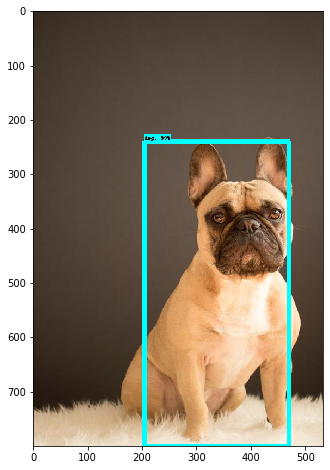

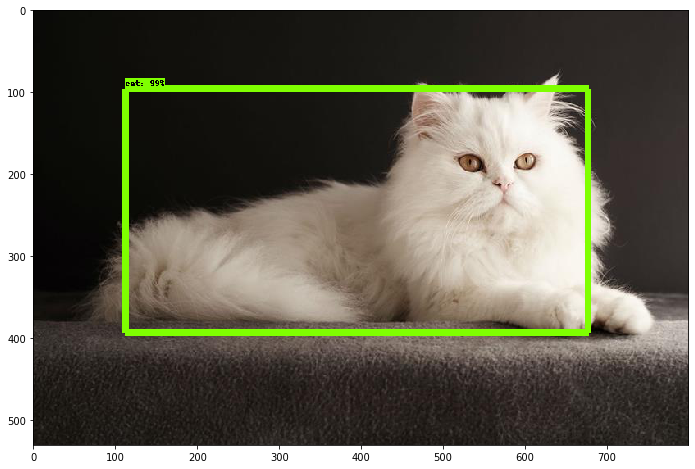

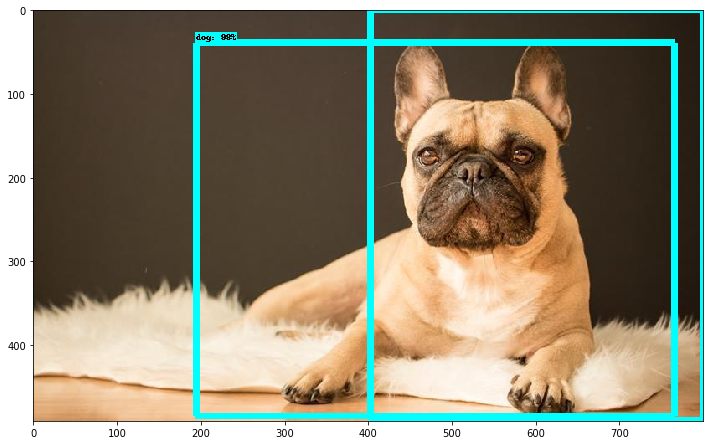

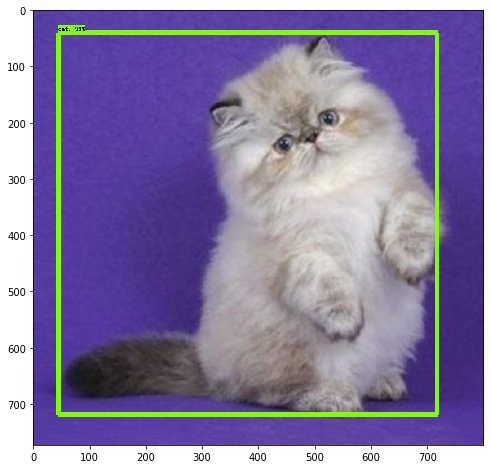

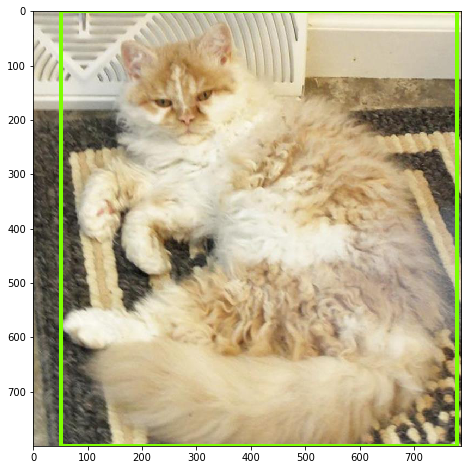

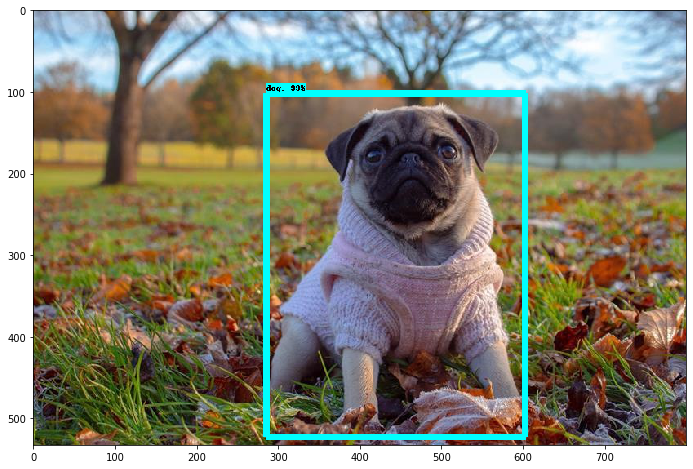

In [4]:
%matplotlib inline
for image_path in TEST_IMAGES_PATHS:
    image = Image.open(image_path)
    image_np = evaluate.load_image_into_numpy_array(image)
    image_np_expanded = np.expand_dims(image_np, axis=0)
    output_dict = evaluate.run_inference_for_single_image(image_np_expanded, detection_graph)
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)